In [5]:
import numpy as np

from matplotlib import pyplot

from pandas import read_csv
from pandas import set_option
from pandas import DataFrame

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from xgboost import XGBClassifier

In [6]:
# Load training data CSV using Pandas
filename = 'train.csv'
data = read_csv(filename, header=0)
print(data.head(10))
# Separate training data into y and X
array = data.values
y = array[:, 1]
X = array[:, 2:18]

   Id  y         x1         x2        x3        x4        x5        x6  \
0   0  1  21.492417  22.475495  4.051168  6.023558  5.052601  5.664391   
1   1  2  25.062431   8.295979  2.880201  4.018839  6.359460  5.756855   
2   2  2  35.137688  19.840681  3.943055  5.158265  5.401766  4.077940   
3   3  2  16.451959  14.196442  4.600019  5.231278  5.304275  6.075448   
4   4  1  18.804761  34.898449  5.487226  6.319400  4.765494  5.747063   
5   5  0  37.101886  24.710228  4.007430  4.756808  6.604554  3.326991   
6   6  1  29.520023  23.004285  4.231708  4.303871  4.187391  5.230488   
7   7  1  24.873782  24.399612  4.111728  5.489592  4.648770  4.906864   
8   8  0  42.656583  22.678325  4.494126  2.641785  3.664210  3.893031   
9   9  2  35.036192  29.256063  4.903419  3.373599  4.323742  5.251261   

         x7        x8         x9        x10        x11        x12        x13  \
0  3.577206  5.077697  22.071242  16.960494  30.862626  32.055150  32.055150   
1  3.560095  5.417843  29

In [7]:
# Load prediction challenge data CSV using Pandas
filename = 'test.csv'
data_challenge = read_csv(filename, header=0)
print(data_challenge.head(10))
# Discard Id, name X_test
array_challenge = data_challenge.values
X_challenge = array_challenge[:, 1:17]

     Id         x1         x2        x3        x4        x5        x6  \
0  2000  32.736768  35.576213  3.492258  5.092860  6.530447  3.865092   
1  2001  33.424490  24.210547  4.937556  5.009089  4.502525  5.044952   
2  2002  27.420850  25.151995  4.376612  5.124932  4.671673  5.443406   
3  2003  19.488380  21.288925  3.075883  5.898795  5.193245  5.515770   
4  2004  25.883480  26.409462  3.195218  4.554671  5.516956  4.993815   
5  2005  17.782275  23.322145  2.385396  5.429651  4.659025  5.897511   
6  2006  34.065399  27.681502  4.085579  4.889636  5.758321  4.714255   
7  2007  36.437052  22.885122  3.849872  5.270903  5.921537  3.927981   
8  2008  28.434098  20.398536  3.539433  5.326328  4.809877  5.483700   
9  2009  24.772839  29.658550  3.571480  5.734532  4.267985  5.400111   

         x7        x8         x9        x10        x11        x12        x13  \
0  3.881205  6.085011  29.973812  19.100617  22.629056  14.908763  14.908763   
1  3.578365  6.141260  25.426591  16

In [8]:
# Split given data into train and test set
validation_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

             0         1         2         3         4         5         6         7         8         9         10  \
count  2000.000  2000.000  2000.000  2000.000  2000.000  2000.000  2000.000  2000.000  2000.000  2000.000  2000.000   
mean     29.563    25.043     4.029     5.113     5.131     4.733     4.142     5.761    26.144    21.083    25.188   
std       9.008     5.024     0.630     0.821     0.787     0.865     0.635     0.817     4.432     8.342     4.996   
min      -4.291     7.095     0.491     1.616     0.953     0.000     0.000     0.000     1.009    -6.662     8.584   
25%      23.082    21.820     3.646     4.572     4.622     4.168     3.773     5.232    23.520    15.401    21.888   
50%      29.530    24.905     4.082     5.103     5.248     4.774     4.191     5.816    26.264    20.510    25.217   
75%      36.632    28.393     4.466     5.701     5.728     5.349     4.586     6.397    28.964    26.006    28.504   
max      55.071    42.085     5.762     7.317   

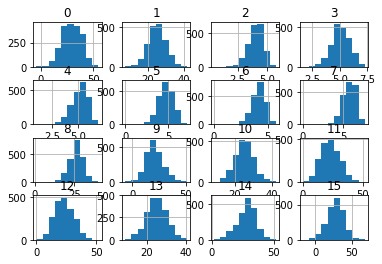

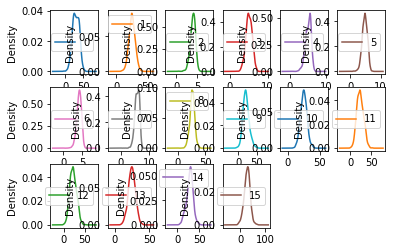

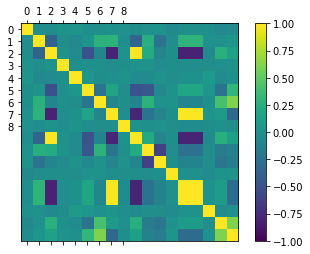

In [136]:
# Initial analysis of training data

set_option('display.width', 120)
set_option('precision', 3)


print(DataFrame(X).describe())

DataFrame(X).hist()
DataFrame(X).plot(kind='density', subplots=True, layout=(3,6), sharex=False)
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(data[0])
#ax.set_yticklabels(data[0])
pyplot.show()

In [9]:
# Make pipeline: mandatory transformations plus other experiments
pipeline = Pipeline(memory=None,
                    steps=[('std_scaler', StandardScaler()),
                           ('poly_features', PolynomialFeatures()),
                           ('anova', SelectKBest(f_regression, k=32)), #best: 64 for RandomForest, 32 for DL
                           ])

In [10]:
pipeline.fit(X_train, y_train)
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)
X_transformed = pipeline.transform(X)
X_challenge_transformed = pipeline.transform(X_challenge)

/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## RandomForest

In [124]:
# RandomForest naive w/o any tuning
model = RandomForestClassifier()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("accuracy: {:.3f}%".format(accuracy*100))

accuracy: 85.750%


In [ ]:
# Tune RandomForest
## Grid searchmodel = RandomForestClassifier()
model = RandomForestClassifier()

n_estimators = [50, 100, 200]
max_depth = [5, 10, 20, None]
min_samples_split = [2, 4, 8, 16, 32]
min_samples_leaf = [1, 2, 4, 8]
max_features = ['log2', 'sqrt', None]

param_grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
print(param_grid)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_transformed, y_train)
# summarize results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("{} ({}) with: {}".format(mean, stdev, param))# plot


In [130]:
# RandomForest 10-fold cross val /w manual tuning
model = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=200)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train_transformed, y_train, cv=kfold)
print("accuracy: {:.3f}% , std dev: {:.3f}%".format(results.mean()*100, results.std()*100))

accuracy: 88.375% , std dev: 2.274%


In [131]:
# Generate prediction RandomForest
model = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=200)
model.fit(X_transformed, y)
y_predict = model.predict(X_challenge_transformed)
# Write prediction to output file
filename = 'prediction.csv'
result = DataFrame(y_predict.astype(np.int32))
result.index = result.index + len(data)
result.to_csv(filename, index_label='Id', header=['y'])

## XGBoost

[0.06511863 0.00555275 0.09540636 0.02826855 0.         0.01362948
 0.05451792 0.00656234 0.         0.         0.02322059 0.02069662
 0.01968703 0.01211509 0.00201918 0.00807673 0.00858152 0.00807673
 0.00201918 0.01463907 0.02624937 0.02372539 0.01867744 0.04038364
 0.0116103  0.         0.06108026 0.01665825 0.02978294 0.0227158
 0.00807673 0.03331651 0.00706714 0.         0.00302877 0.01413428
 0.02170621 0.01665825 0.01060071 0.0111055  0.00252398 0.01060071
 0.00858152 0.         0.01211509 0.00908632 0.         0.01615346
 0.02019182 0.01968703 0.00353357 0.         0.00908632 0.01413428
 0.0116103  0.01009591 0.01060071 0.01362948 0.         0.01514387
 0.         0.         0.03785967 0.01060071]


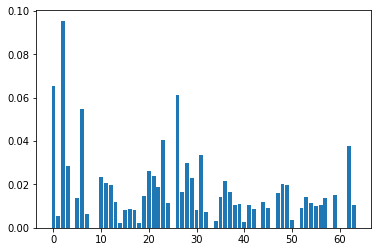

In [137]:
# Plot feature importance
model = XGBClassifier()
model.fit(X_train_transformed, y_train)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [183]:
# XGBoost naive w/o any tuning
model = XGBClassifier()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("accuracy: {:.3f}%".format(accuracy*100))

accuracy: 84.500%


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [138]:
# Tune XGBoost
## Grid searchmodel = XGBClassifier()
model = XGBClassifier()

n_estimators = [50, 100, 200, 400]
max_depth = [1, 2, 4, 8, 16, 32]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
print(param_grid)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_transformed, y_train)

# Print grid search results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("{} ({}) with: {}".format(mean, stdev, param))# plot

{'max_depth': [1, 2, 4, 8, 16, 32], 'n_estimators': [50, 100, 200, 400]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.7min finished


In [ ]:
# XGBoost 10-fold cross val /w tuning
model = XGBClassifier(max_depth=4, n_estimators=100, learning_rate=0.01, subsample=1.0, gamma=1.0, colsample_bytree=1.0, reg_lambda=0.1, reg_alpha=0.5, min_child_weight=1, silent=False)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train_transformed, y_train, cv=kfold)
print("CV: accuracy: {:.3f}% , std dev: {:.3f}%".format(results.mean()*100, results.std()*100))

In [142]:
# Generate prediction XGBoost
model = XGBClassifier(max_depth=4, n_estimators=100, learning_rate=0.01, subsample=1.0, gamma=1.0, colsample_bytree=1.0, reg_lambda=0.1, reg_alpha=0.5, min_child_weight=1, silent=False)
model.fit(X_transformed, y)
y_predict = model.predict(X_challenge_transformed)
# Write prediction to output file
filename = 'prediction_XGBoost.csv'
result = DataFrame(y_predict.astype(np.int32))
result.index = result.index + len(data)
result.to_csv(filename, index_label='Id', header=['y'])

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Deep Learning with Keras

In [180]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

y_train_categorical = keras.utils.to_categorical(y_train, num_classes=3)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=3)
y_categorical = keras.utils.to_categorical(y, num_classes=3)


model = Sequential()

model.add(Dense(128, activation='relu', input_dim=32))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train_transformed, y_train_categorical,
          epochs=100,
          batch_size=64)
score = model.evaluate(X_test_transformed, y_test_categorical, batch_size=64)

Epoch 1/100
1600/1600 [==============================] - 1s 371us/step - loss: 1.1830 - acc: 0.4356
Epoch 2/100
1600/1600 [==============================] - 0s 77us/step - loss: 0.8212 - acc: 0.6519
Epoch 3/100
1600/1600 [==============================] - 0s 92us/step - loss: 0.6703 - acc: 0.7356
Epoch 4/100
1600/1600 [==============================] - 0s 73us/step - loss: 0.6024 - acc: 0.7762
Epoch 5/100
1600/1600 [==============================] - 0s 92us/step - loss: 0.5610 - acc: 0.7944
Epoch 6/100
1600/1600 [==============================] - 0s 76us/step - loss: 0.5408 - acc: 0.8069
Epoch 7/100
1600/1600 [==============================] - 0s 98us/step - loss: 0.5152 - acc: 0.8100
Epoch 8/100
1600/1600 [==============================] - 0s 74us/step - loss: 0.5019 - acc: 0.8106
Epoch 9/100
1600/1600 [==============================] - 0s 104us/step - loss: 0.4849 - acc: 0.8256
Epoch 10/100
1600/1600 [==============================] - 0s 73us/step - loss: 0.4664 - acc: 0.8387
Epoch 1

In [181]:
# Generate prediction
y_predict = model.predict(X_challenge_transformed)

# Write prediction to output file
filename = 'prediction_MLP.csv'
result = DataFrame(np.argmax(y_predict, axis=1))
result.index = result.index + len(data)
result.to_csv(filename, index_label='Id', header=['y'])

## DeepSuperLearner

In [3]:
from sklearn.ensemble.forest import ExtraTreesClassifier as ExtremeRandomizedTrees
from sklearn.neighbors import KNeighborsClassifier as kNearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from deepSuperLearner import *
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
ERT_learner = ExtremeRandomizedTrees(n_estimators=200, max_depth=None, max_features=1)
kNN_learner = kNearestNeighbors(n_neighbors=11)
LR_learner = LogisticRegression()
RFC_learner = RandomForestClassifier(n_estimators=200, max_depth=None)
XGB_learner = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=1.)
Base_learners = {'ExtremeRandomizedTrees':ERT_learner, 'kNearestNeighbors':kNN_learner, 'LogisticRegression':LR_learner,
                 'RandomForestClassifier':RFC_learner, 'XGBClassifier':XGB_learner}

np.random.seed(100)

In [22]:
DSL_learner = DeepSuperLearner(Base_learners)
DSL_learner.fit(X_train_transformed, y_train, max_iterations=40, sample_weight=None)
y_pred = DSL_learner.predict(X_test_transformed)

predictions = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, predictions)
print("accuracy: {:.3f}%".format(accuracy*100))

Iteration: 0 Loss: 0.30892580393262603
Weights:  [0.         0.288789   0.14519638 0.09970447 0.46631016]
Iteration: 1 Loss: 0.31509474849693225
Weights:  [0.         0.25692991 0.5418096  0.20126049 0.        ]
accuracy: 89.000%


In [23]:
# Generate prediction
y_predict = DSL_learner.predict(X_challenge_transformed)

# Write prediction to output file
filename = 'prediction_DSL.csv'
result = DataFrame(np.argmax(y_predict, axis=1))
result.index = result.index + len(data)
result.to_csv(filename, index_label='Id', header=['y'])